In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-dark')

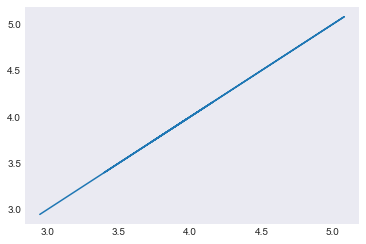

In [23]:
a = np.random.normal(loc=4, scale=0.8, size=10)
plt.plot(a, a)

In [15]:
# 샘플 사이즈
size_array = np.arange(100, 100100, 100)
print(len(size_array))

#0으로 sample_mean_array_size라는 곳에 1001개의 자리를 만들어줌
sample_mean_array_size=np.zeros(len(size_array))
sample_mean_array_size[:10] 


1000


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
np.random.seed(1)

for i in range(0, len(size_array)):
    sample = stats.norm(loc=4, scale=0.8).rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
    
sample_mean_array_size[:10]

array([4.04846628, 4.06504667, 4.04521995, 3.99907008, 4.06223342,
       3.97679927, 3.99388208, 3.98254666, 4.03138659, 4.03199549])

Text(0, 0.5, 'sample mean')

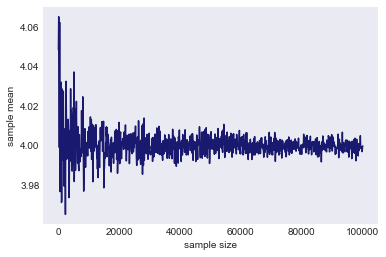

In [27]:
plt.plot(size_array, sample_mean_array_size, color='midnightblue')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [28]:
# 사용자 함수로 만들어본 표본평균 계산 : cal_sample_mean(size, n_trial)
population = stats.norm(loc=4, scale=0.8)
def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size=size).mean()
    return sample_mean_array 

np.mean(cal_sample_mean(size=10, n_trial=10000))

4.00234615465485

In [30]:
# 민아님이 말씀해주신 모평균과 가까워지는 방법
def cal_sample_mean2(size, n_trial):
    cal_sample_array = np.zeros(n_trial)
    for i in range(n_trial):
        cal_sample_array[i] = population.rvs(size=size).mean()
    return cal_sample_array

np.mean(cal_sample_mean2(size=10, n_trial=10000))

4.000231480293406

In [35]:
# 샘플 사이즈 10
size_10=cal_sample_mean(size=10, n_trial=10000)
size_10_df = pd.DataFrame({'sample_mean' : size_10,
                          'size':np.tile('size_10', 10000)}) #np.tile : 'size_10'을 10000번 반복
# 샘플 사이즈 20
size_20=cal_sample_mean(size=20, n_trial=10000)
size_20_df = pd.DataFrame({'sample_mean':size_20,
                          'size':np.tile('size_20', 10000)})
# 샘플 사이즈 30
size_30=cal_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({'sample_mean':size_30,
                          'size':np.tile('size_30', 10000)})

sim_result = pd.concat([size_10_df, size_20_df, size_30_df])
sim_result

,sample_mean,size
0,4.137322,size_10
1,3.779838,size_10
2,4.100099,size_10
3,3.721067,size_10
4,4.379635,size_10
...,...,...
9995,3.992797,size_30
9996,3.940708,size_30
9997,4.115143,size_30
9998,3.976453,size_30


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

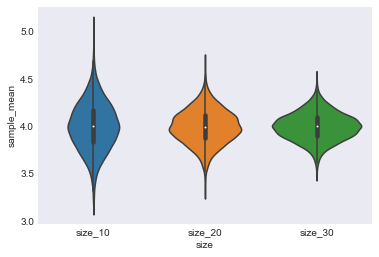

In [37]:
sns.violinplot(x='size', y='sample_mean', data=sim_result)

In [42]:
# 시뮬레이션 : 샘플 사이즈가 커질수록 표본 평균의 표준편차가 작아진다.
size_array=np.arange(2,102,2)
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)

for i in range(0, len(size_array)):
    sample_mean = cal_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)
sample_mean_std_array

array([0.4754462 , 0.4285657 , 0.30414517, 0.32924535, 0.25856595,
       0.24626845, 0.23742025, 0.16226763, 0.19798736, 0.18870299,
       0.16754595, 0.16234703, 0.1654929 , 0.14444792, 0.15400405,
       0.14877245, 0.14241811, 0.12698156, 0.13151882, 0.11471949,
       0.12300885, 0.12191558, 0.12164469, 0.11209033, 0.11048279,
       0.10275882, 0.10812035, 0.11096544, 0.09798184, 0.09843221,
       0.10069034, 0.10466181, 0.10505264, 0.0909866 , 0.09954995,
       0.09844713, 0.1063186 , 0.08799258, 0.09110622, 0.08788447,
       0.1012906 , 0.10069518, 0.07995633, 0.08095862, 0.08223575,
       0.07559803, 0.07985282, 0.07994538, 0.08189658, 0.07557071])

In [44]:
standard_error = 0.8 /np.sqrt(size_array)
standard_error

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

Text(0, 0.5, 'mean std val')

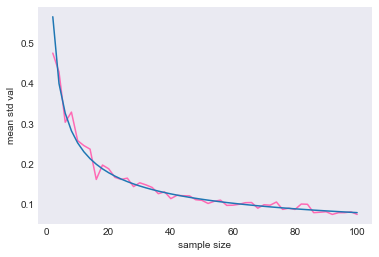

In [45]:
# 표본평균의 표본편차 그래프
plt.plot(size_array, sample_mean_std_array, color='hotpink')
plt.xlabel('sample size')
plt.ylabel('mean std value')

# 시뮬레이션 결과와 표준 오차 그래프
plt.plot(size_array, standard_error)
plt.xlabel('sample size')
plt.ylabel('mean std val')

In [ ]:
# 과제 
# 샘플 사이즈가 커지면 불편분산은 모분산 0.64에 가까워진다는 것을 그래프로 설명하세요


In [52]:
# 정규분포의 확률밀도 계산 pdf=확률밀도함수
a = stats.norm.pdf(loc=4, scale=0.8, x=4)
print(a)

0.49867785050179086


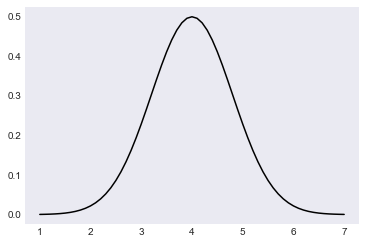

In [53]:
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='black')

In [54]:
norm_dist = stats.norm(loc=4, scale=0.8)
print(norm_dist.pdf(x=4))
norm_dist.pdf(x=3)

0.49867785050179086


0.2283113567362774

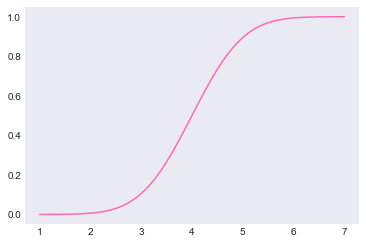

In [55]:
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='hotpink')

In [56]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

In [57]:
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [71]:
# t값의 표본분포
np.random.seed(1)
t_value_array=np.zeros(10000)
norm_dist=stats.norm(loc=4, scale=0.8)
for i in range(0,10000):
    sample=norm_dist.rvs(size=10)
    sample_mean =np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i]=(sample_mean-4)/ sample_se

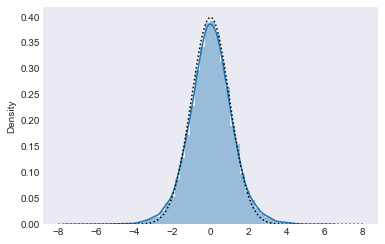

In [73]:
# t분포
sns.distplot(t_value_array)

# x표준 정규분포의 확률밀도
x = np.arange(-8,8.1, 0.1)
plt.plot(x,stats.norm.pdf(x=x),
        color='black', linestyle='dotted')

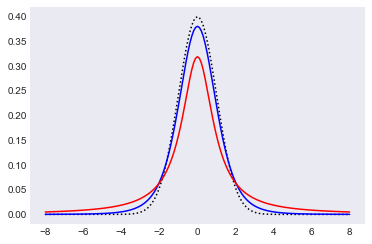

In [74]:
# 자유독 n이 커짐에 따라 표준 정규분포 N(0,1)에 수렴
plt.plot(x,stats.norm.pdf(x=x),
        color='black', linestyle='dotted')
plt.plot(x, stats.t.pdf(x=x, df=5),  #df= degree of freedom : 자유도, 얘가 30이 되면 거의 z-score가 된다
        color='blue')
plt.plot(x,stats.t.pdf(x=x, df=1),
        color='red')